# Explore Kestrel Segmentations

To install PyAudioAnalysis
```python
pip install pyAudioAnalysis
```

Or developer version

```python
git clone https://github.com/tyiannak/pyAudioAnalysis.git
cd pyAudioAnalysis
pip install -r ./requirements.txt
pip install -e .
cd ..
```

In [1]:
import matplotlib.pyplot as plt
import sound_segmentation

PSeg = sound_segmentation 
from pydub.utils import get_array_type
import array

import os
import pyAudioAnalysis
import numpy as np
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

<ipython-input-2-1483380e6863>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


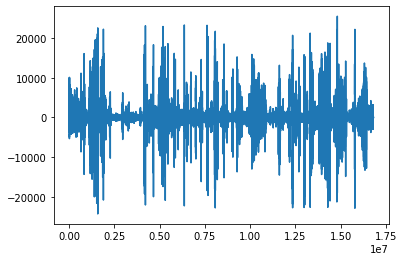

In [2]:
path = os.path.join(os.getcwd(), "../../", "inputs/mp3/mauritius_kestrel.mp3")

(fs,num_a,sound,_) = PSeg.load_data(path)
fig = plt.figure()
plt.plot(num_a)
fig.show()




<ipython-input-3-e57caea5eebe>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


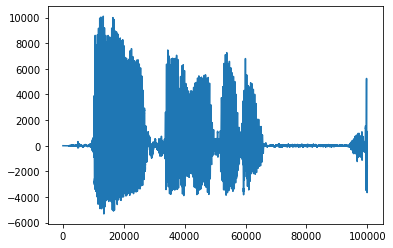

In [3]:
#sound = np.array(sound[0:1000])
#sound = np.transpose(sound)

left = sound.split_to_mono()[0]
bit_depth = left.sample_width * 8

array_type = get_array_type(bit_depth)
num_a = array.array(array_type, left._data)

fig = plt.figure()
plt.plot(num_a[0:100000])
fig.show()


In [4]:
#?aS.silence_removal
#sound = np.array(sound[0:1000])
#sound = np.transpose(sound)


ValueError: x and y must have same first dimension, but have shapes (114,) and (113,)

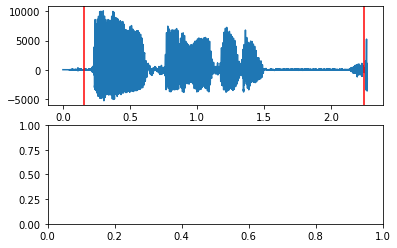

In [5]:
segments = aS.silence_removal(np.array(num_a[0:100000]), fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.1, plot = True)


In [ ]:



#path = os.path.join(os.getcwd(), "../mp3", "XC155388-Pink_Pigeon_(song,_Mauritius,_Black_River_Gorge,_nov2012,_2).MP3")

#[Fs, x] = aIO.read_audio_file(path)



In [ ]:

segs_th=[]
for seg in segments:
    onset = int(seg[0]*fs)
    offset = int(seg[1]*fs)
    wave = num_a[onset:offset]
    segs_th.extend(wave)


In [ ]:
fig = plt.figure()
plt.plot(segs_th,label="hard_threshold")

plt.legend()
plt.show()